In [1]:
%matplotlib inline

In [2]:
from IPython.display import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder

from sklearn.linear_model import LogisticRegression

## Introduction to Machine Learning

### Live Demos

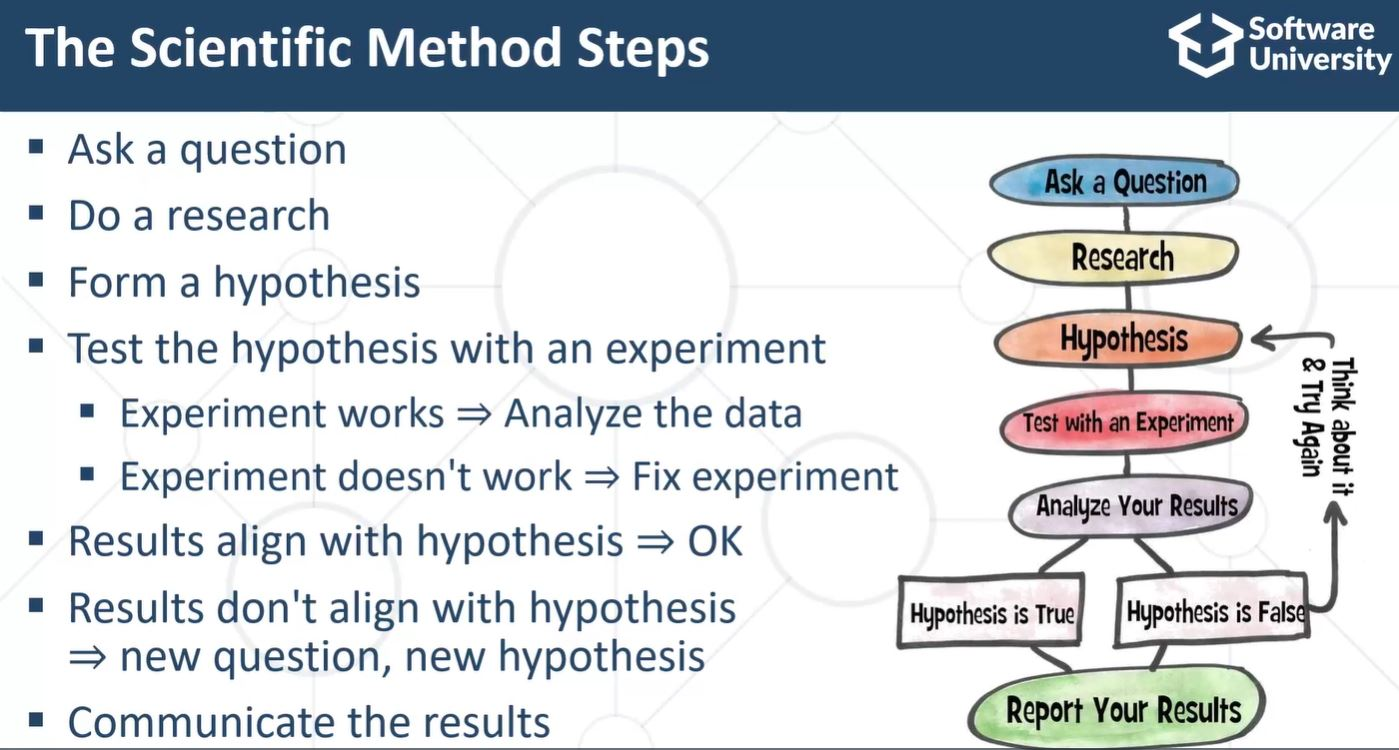

In [3]:
image_path = "capture_01.JPG"
Image(filename=image_path)

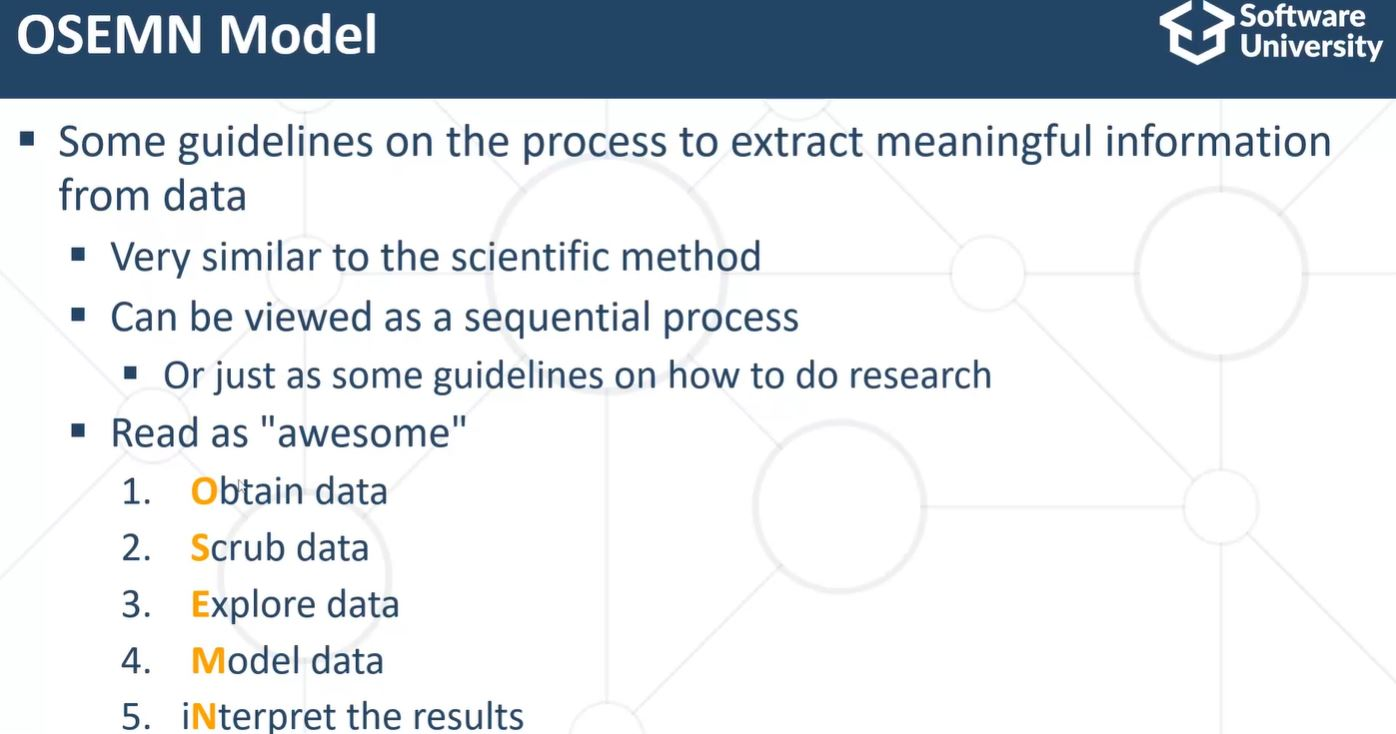

In [4]:
image_path = "capture_02.JPG"
Image(filename=image_path)

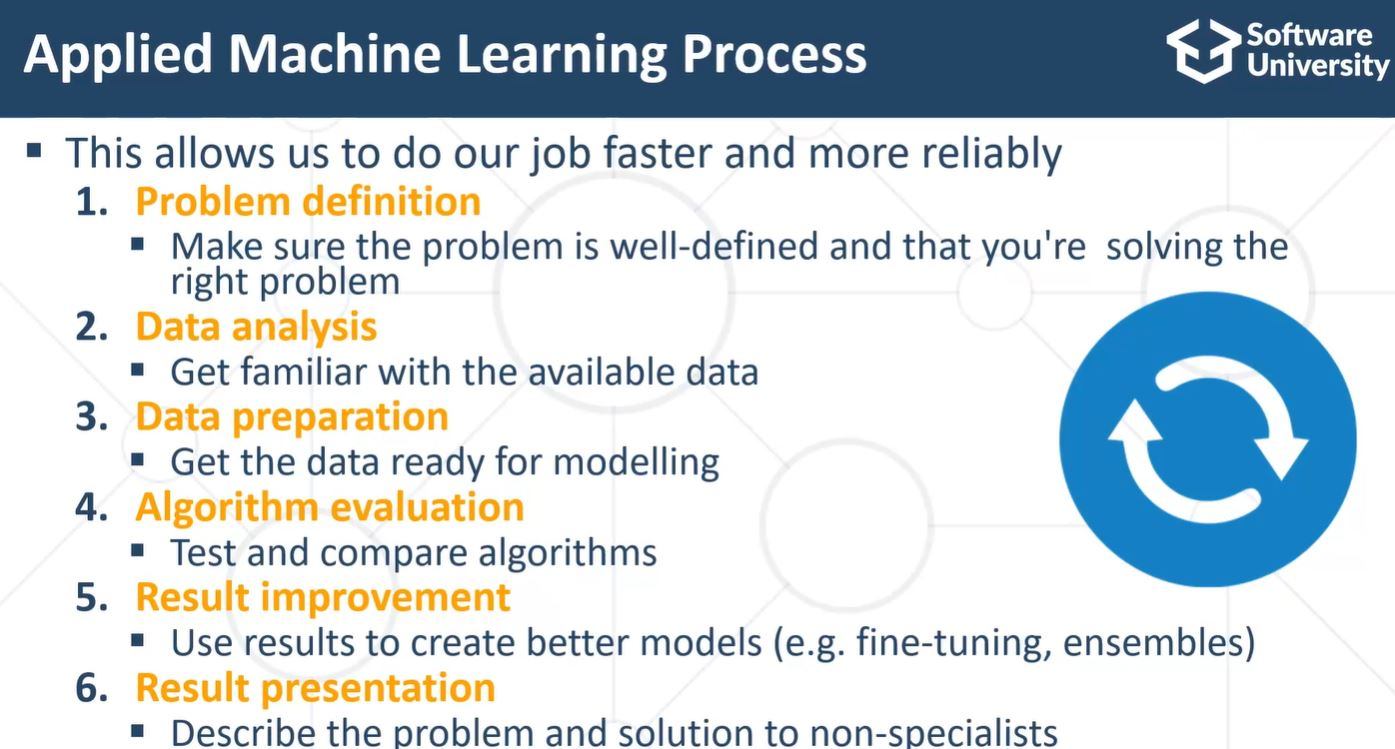

In [5]:
image_path = "capture_03.JPG"
Image(filename=image_path)

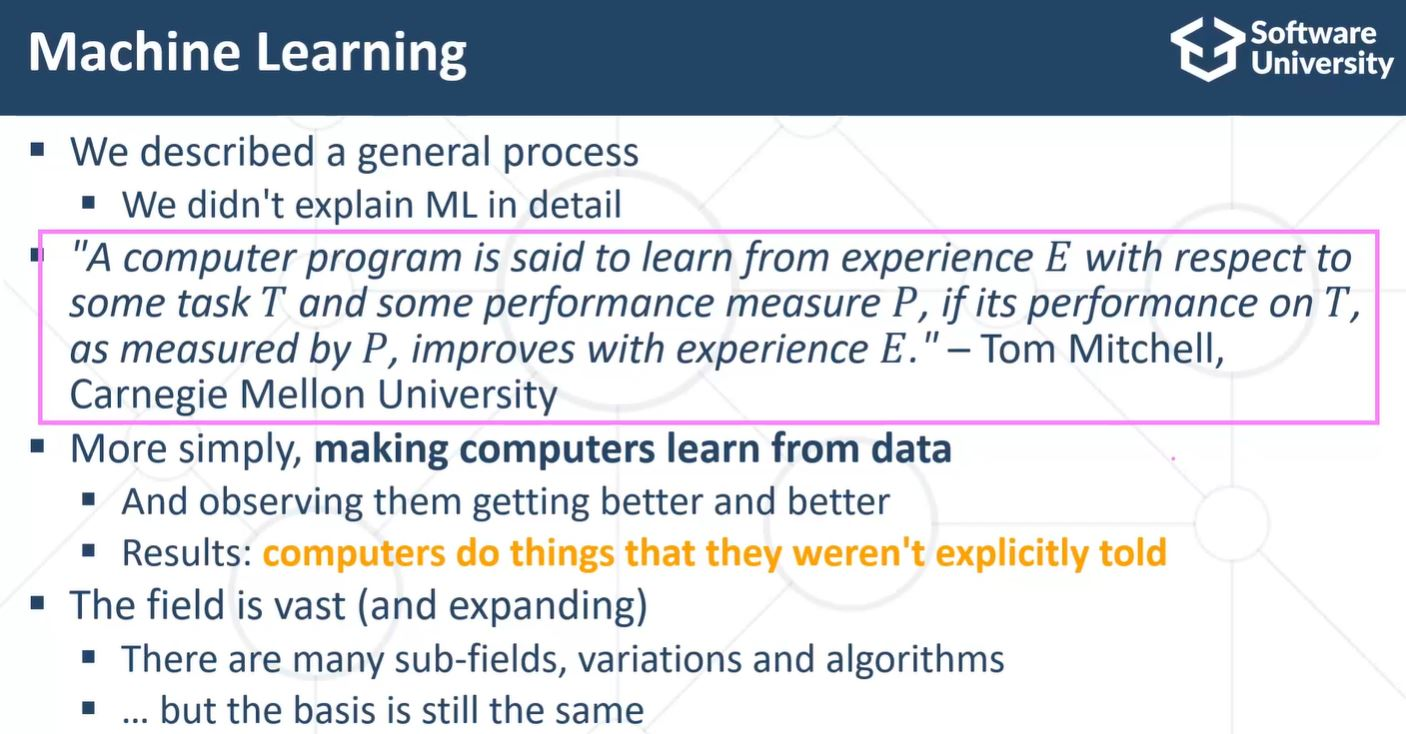

In [6]:
image_path = "capture_04.JPG"
Image(filename=image_path)

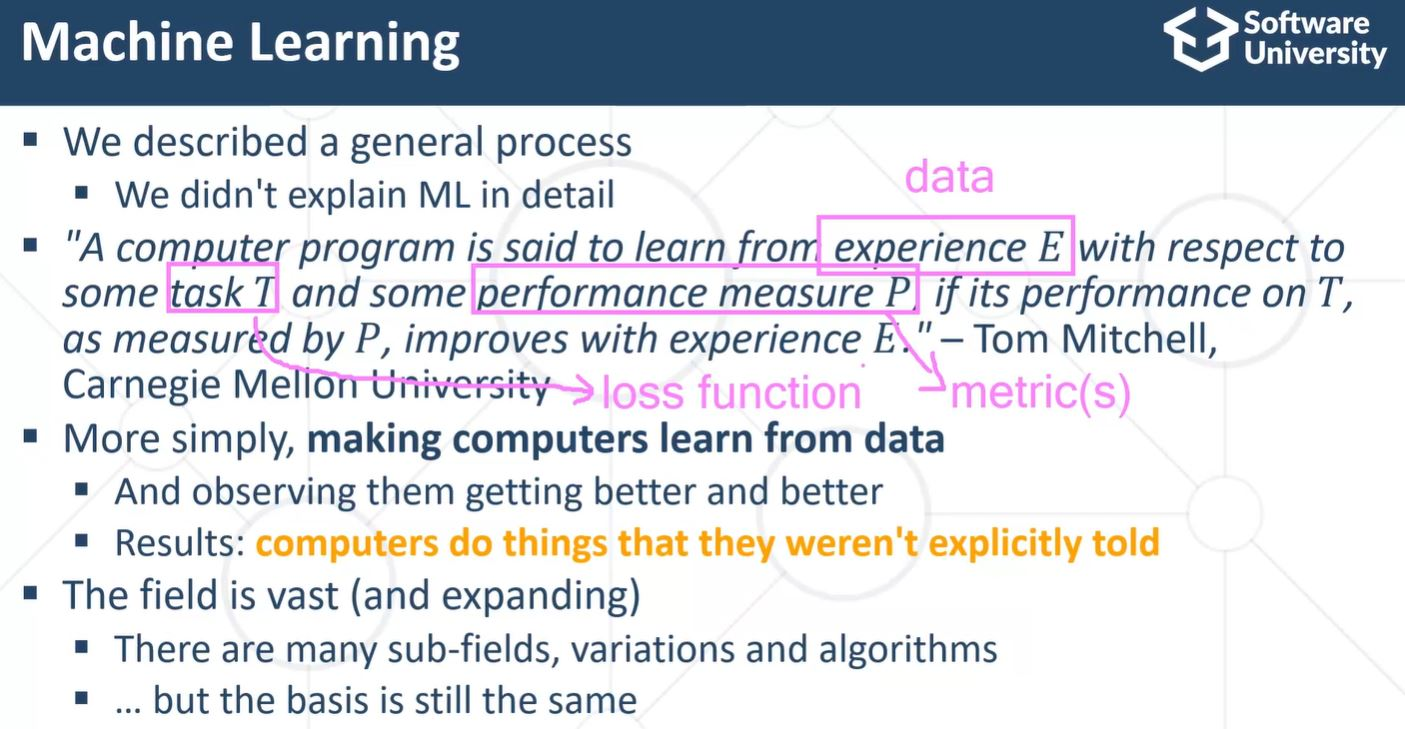

In [7]:
image_path = "capture_05.JPG"
Image(filename=image_path)

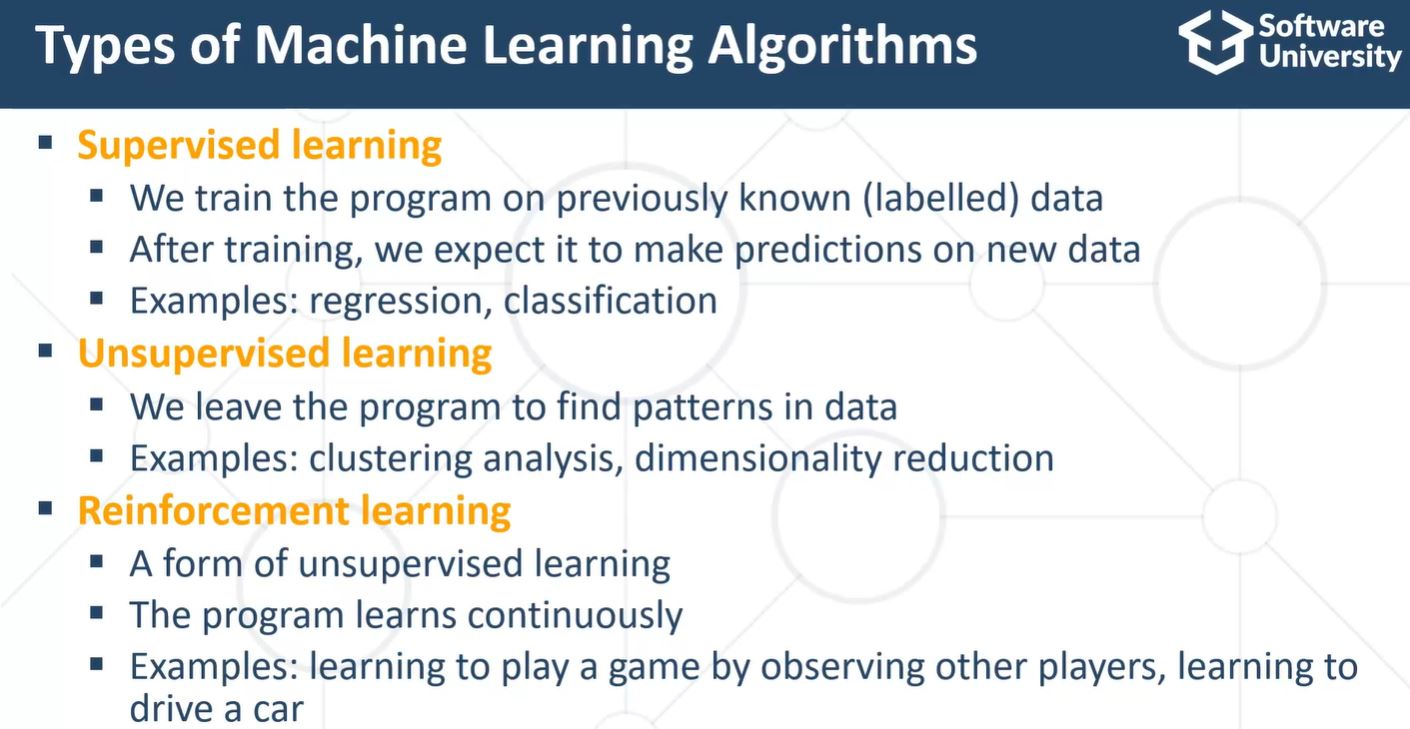

In [8]:
image_path = "capture_06.JPG"
Image(filename=image_path)

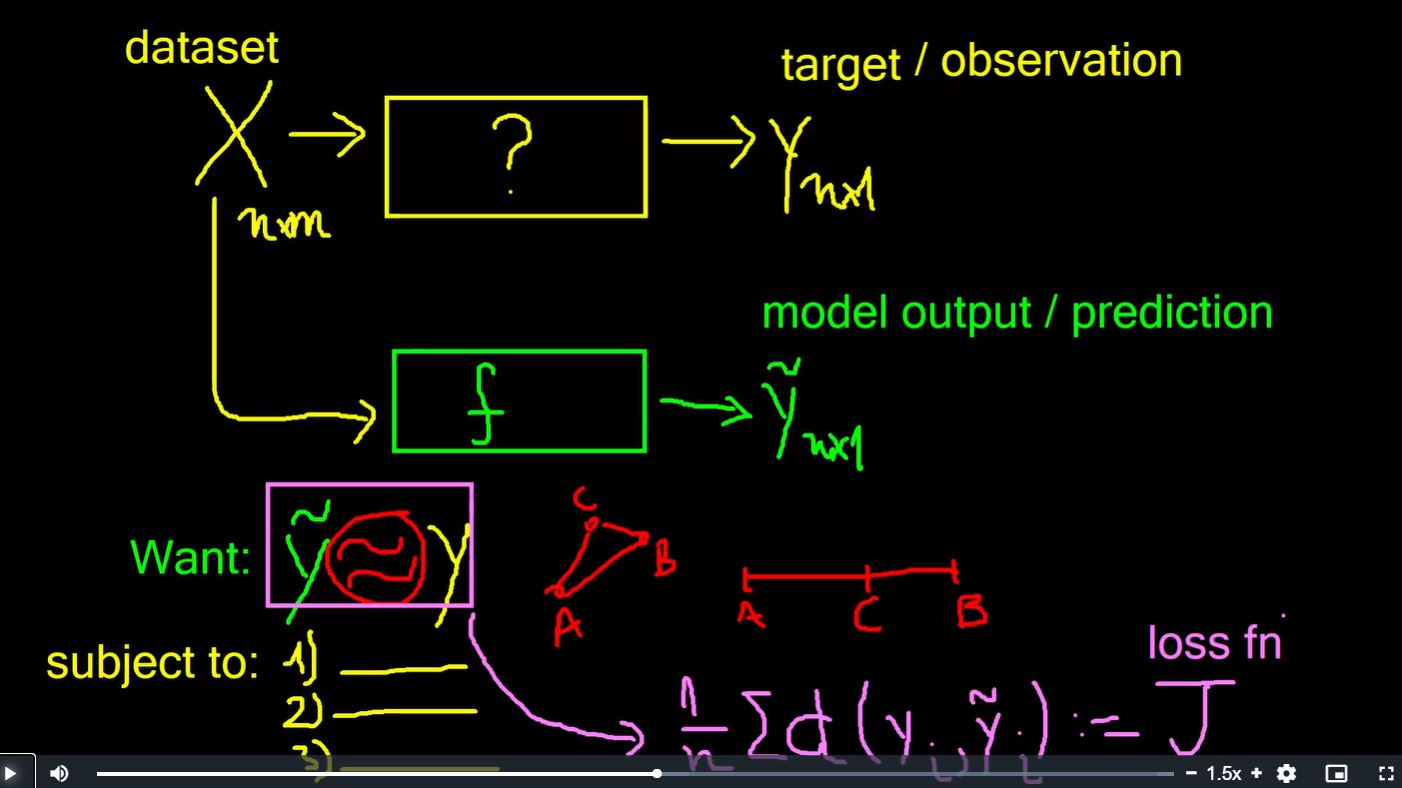

In [9]:
image_path = "capture_07.JPG"
Image(filename=image_path)

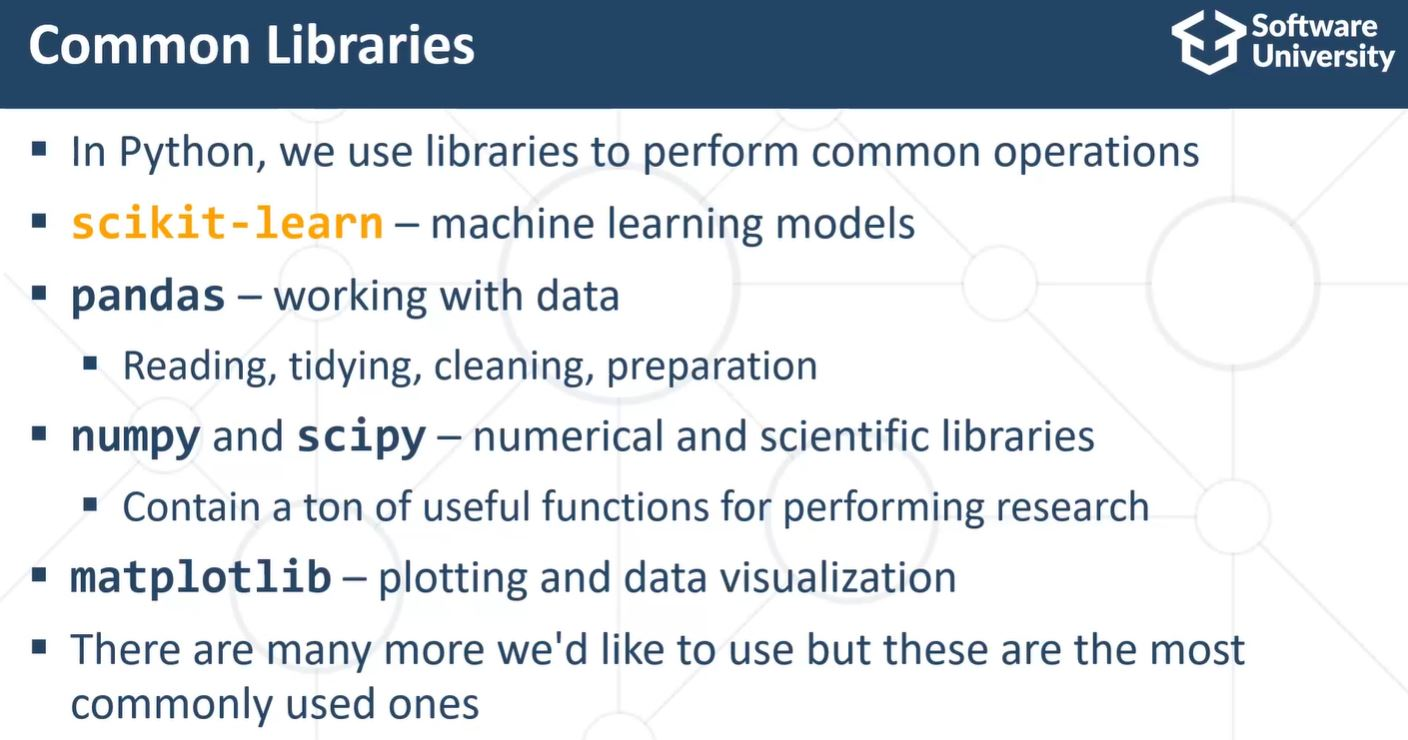

In [10]:
image_path = "capture_08.JPG"
Image(filename=image_path)

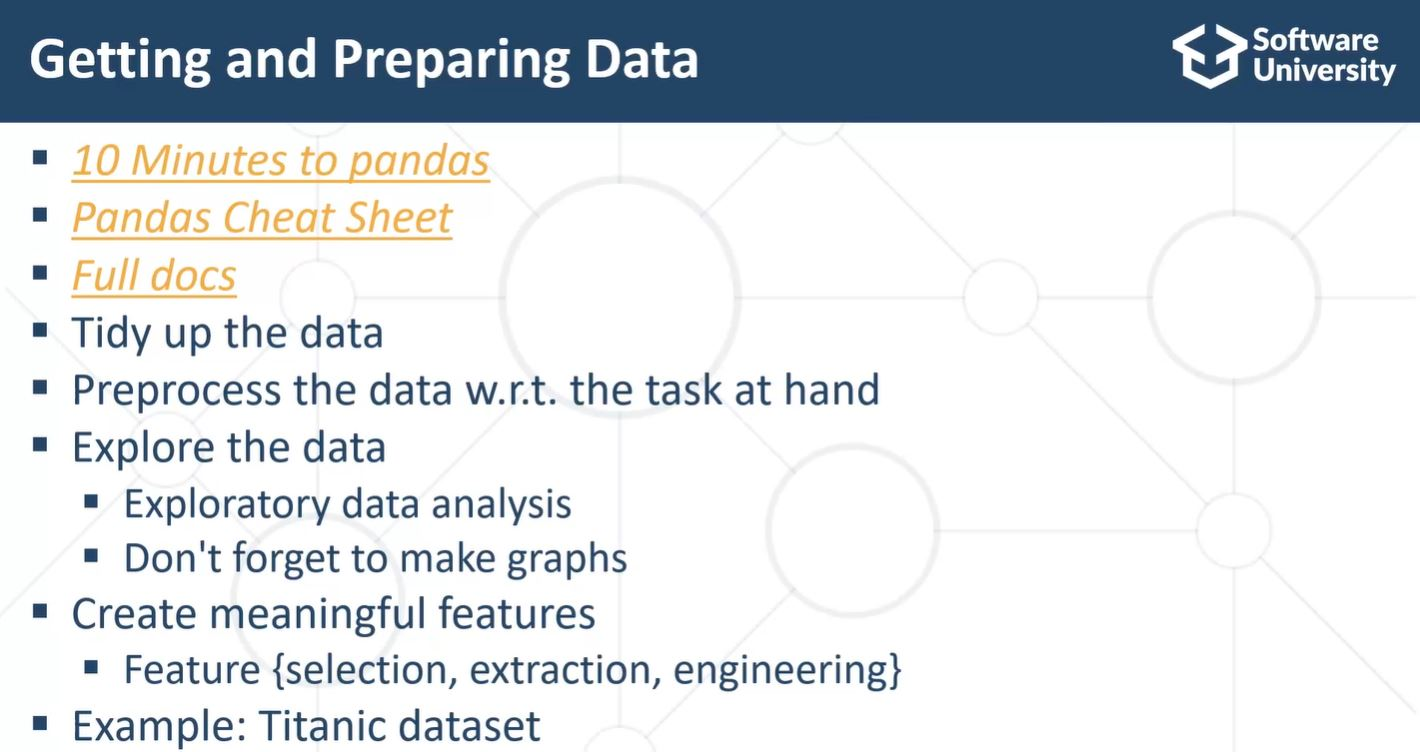

In [11]:
image_path = "capture_09.JPG"
Image(filename=image_path)

In [12]:
diabetic_data = pd.read_csv("data/diabetic_data.csv", na_values=['?'])

C:\Users\VioletaAtanasova\AppData\Local\Temp\ipykernel_25900\2427560346.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  diabetic_data = pd.read_csv("data/diabetic_data.csv", na_values=['?'])


In [13]:
diabetic_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [14]:
diabetic_data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [15]:
diabetic_data.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [16]:
diabetic_data.readmitted

0          NO
1         >30
2          NO
3          NO
4          NO
         ... 
101761    >30
101762     NO
101763     NO
101764     NO
101765     NO
Name: readmitted, Length: 101766, dtype: object

In [17]:
diabetic_data.readmitted.value_counts(dropna=False)

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

In [18]:
diabetic_data.readmitted.value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

In [19]:
diabetic_data.readmitted.unique()

array(['NO', '>30', '<30'], dtype=object)

In [20]:
diabetic_data.race.value_counts()

race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [21]:
diabetic_data.race.value_counts(dropna=False)

race
Caucasian          76099
AfricanAmerican    19210
NaN                 2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [22]:
diabetic_data.gender.value_counts()

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

In [23]:
diabetic_data.age.unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [24]:
diabetic_data.age.value_counts(dropna=False)

age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

In [25]:
# normalisation in %
diabetic_data.age.value_counts(dropna=False) / len(diabetic_data)*100

age
[70-80)     25.615628
[60-70)     22.092840
[50-60)     16.956547
[80-90)     16.898571
[40-50)      9.516931
[30-40)      3.709490
[90-100)     2.744532
[20-30)      1.628245
[10-20)      0.679009
[0-10)       0.158206
Name: count, dtype: float64

In [26]:
diabetic_data.discharge_disposition_id.value_counts(dropna=False)

discharge_disposition_id
1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: count, dtype: int64

In [27]:
diabetic_data.patient_nbr.value_counts()

patient_nbr
88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: count, Length: 71518, dtype: int64

In [28]:
diabetic_data[diabetic_data.patient_nbr=="88785891"]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


In [29]:
diabetic_data[diabetic_data.patient_nbr=="88785891"].sort_values("encounter_id")

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


In [30]:
attributies = diabetic_data.drop(columns="readmitted")

In [31]:
target = diabetic_data.readmitted

In [32]:
attributies.shape

(101766, 49)

In [33]:
attributies = attributies.drop(columns=["encounter_id", "patient_nbr"])

In [34]:
attributies.shape

(101766, 47)

In [35]:
attributies.diag_1.value_counts()

diag_1
428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
817       1
61        1
148       1
870       1
V51       1
Name: count, Length: 716, dtype: int64

In [36]:
attributies = attributies.drop(columns=["weight"])

In [37]:
attributies = attributies.drop(columns=['payer_code', 'medical_specialty'])

In [38]:
attributies.dropna()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
162,Caucasian,Male,[80-90),6,3,7,5,47,1,6,...,No,No,No,No,No,No,No,No,No,No
460,AfricanAmerican,Female,[70-80),6,1,7,10,72,1,19,...,No,No,Up,No,No,No,No,No,Ch,Yes
593,Caucasian,Female,[50-60),6,1,7,2,61,0,5,...,No,No,Steady,No,No,No,No,No,No,Yes
696,Other,Male,[70-80),6,6,7,11,71,1,20,...,No,No,No,No,No,No,No,No,No,Yes
771,Caucasian,Female,[30-40),6,1,2,14,43,0,11,...,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100386,Caucasian,Male,[60-70),2,1,1,6,51,0,20,...,No,No,No,No,No,No,No,No,No,Yes
100493,Caucasian,Female,[40-50),1,1,7,3,78,0,8,...,No,No,No,No,No,No,No,No,No,No
100578,Caucasian,Female,[60-70),1,2,7,4,90,0,25,...,No,No,No,No,No,No,No,No,No,No
101029,Caucasian,Male,[50-60),1,1,7,7,72,0,16,...,No,No,No,No,No,No,No,No,Ch,Yes


In [39]:
diabetic_data.time_in_hospital.value_counts()

time_in_hospital
3     17756
2     17224
1     14208
4     13924
5      9966
6      7539
7      5859
8      4391
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: count, dtype: int64

<Axes: >

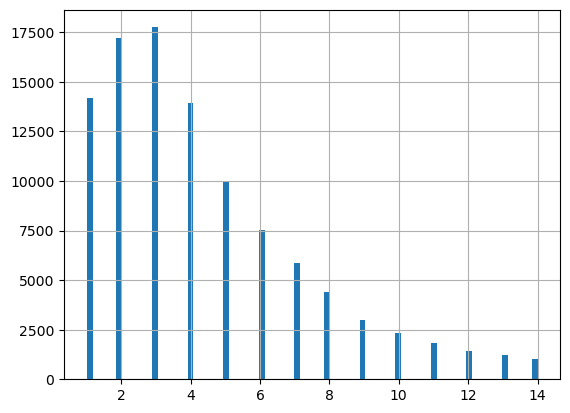

In [40]:
diabetic_data.time_in_hospital.hist(bins = 'fd')

<Axes: >

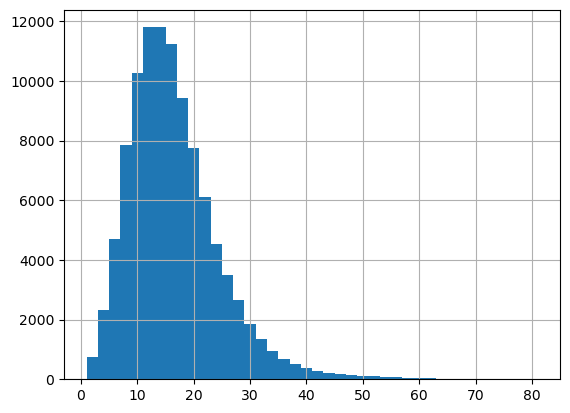

In [41]:
diabetic_data.num_medications.hist(bins=40)

In [42]:
# скалиране на данните със Z-score: (данни - средно)/стандартно отклонение
# С  такива дананни се работи с по-малки грешки от закръгляния
(diabetic_data.num_medications - diabetic_data.num_medications.mean())/diabetic_data.num_medications.std()

0        -1.848259
1         0.243388
2        -0.371802
3        -0.002688
4        -0.986992
            ...   
101761   -0.002688
101762    0.243388
101763   -0.863954
101764    0.612503
101765   -1.602182
Name: num_medications, Length: 101766, dtype: float64

<Axes: >

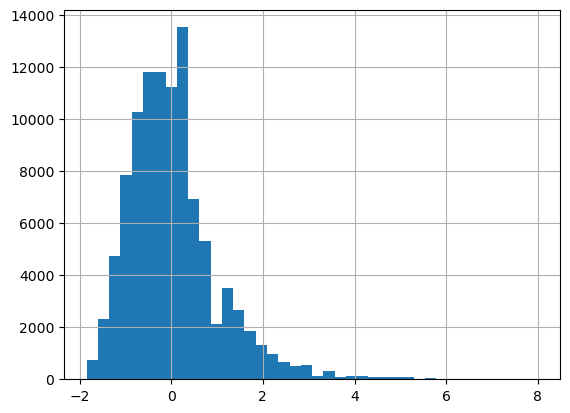

In [43]:
# Min-max scaling
((diabetic_data.num_medications - diabetic_data.num_medications.mean())/diabetic_data.num_medications.std()).hist(bins=40)

In [44]:
# друг начин за стандартизация (ot 0 do 1)
(diabetic_data.num_medications - diabetic_data.num_medications.min())/(diabetic_data.num_medications.max()-diabetic_data.num_medications.min())

0         0.0000
1         0.2125
2         0.1500
3         0.1875
4         0.0875
           ...  
101761    0.1875
101762    0.2125
101763    0.1000
101764    0.2500
101765    0.0250
Name: num_medications, Length: 101766, dtype: float64

<Axes: >

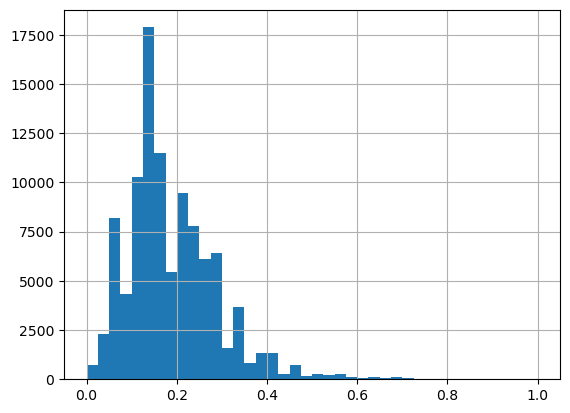

In [45]:
((diabetic_data.num_medications - diabetic_data.num_medications.min())/(diabetic_data.num_medications.max()-diabetic_data.num_medications.min())).hist(bins=40)

In [46]:
diabetic_data.metformin

0             No
1             No
2             No
3             No
4             No
           ...  
101761    Steady
101762        No
101763    Steady
101764        No
101765        No
Name: metformin, Length: 101766, dtype: object

In [47]:
pd.get_dummies(diabetic_data.metformin)

,Down,No,Steady,Up
0,False,True,False,False
1,False,True,False,False
2,False,True,False,False
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
101761,False,False,True,False
101762,False,True,False,False
101763,False,False,True,False
101764,False,True,False,False


In [48]:
# Категорийните фийчъри тр да се обърнат в числа
# това е One-hot encoding методът (единицата е там, където е интересно)

pd.get_dummies(diabetic_data.metformin).astype(int)


,Down,No,Steady,Up
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
101761,0,0,1,0
101762,0,1,0,0
101763,0,0,1,0
101764,0,1,0,0


In [49]:
attributies.metformin.replace({"No": -99, "Down": -1, "Steady": 0, "Up": 1})

0        -99
1        -99
2        -99
3        -99
4        -99
          ..
101761     0
101762   -99
101763     0
101764   -99
101765   -99
Name: metformin, Length: 101766, dtype: int64

In [50]:
# ако по този начин минем през всички категорийни променливи - колоните ще станат много повече. 
# в случая с лекарството от 1 колона получихме 4. 
# затова тр да се мисли как да се редуцират колоните

attributies = pd.get_dummies(attributies, drop_first = True)

In [51]:
attributies

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
0,6,25,1,1,41,0,1,0,0,0,...,False,True,False,False,False,False,False,False,True,False
1,1,1,7,3,59,0,18,0,0,0,...,True,True,False,False,False,False,False,False,False,True
2,1,1,7,2,11,5,13,2,0,1,...,False,True,False,False,False,False,False,False,True,True
3,1,1,7,2,44,1,16,0,0,0,...,True,True,False,False,False,False,False,False,False,True
4,1,1,7,1,51,0,8,0,0,0,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,1,3,7,3,51,0,16,0,0,0,...,False,True,False,False,False,False,False,False,False,True
101762,1,4,5,5,33,3,18,0,0,1,...,False,True,False,False,False,False,False,False,True,True
101763,1,1,7,1,53,0,9,1,0,0,...,False,True,False,False,False,False,False,False,False,True
101764,2,3,7,10,45,2,21,0,0,1,...,True,True,False,False,False,False,False,False,False,True


In [54]:
scaler = MinMaxScaler()

In [55]:
scaler.fit(attributies)

MinMaxScaler()

In [56]:
scaler.data_range_

array([ 7., 27., 24., ...,  1.,  1.,  1.])

In [58]:
attributies = scaler.transform(attributies)

In [59]:
attributies

array([[0.71428571, 0.88888889, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.25      , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.25      , ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.25      , ..., 0.        , 0.        ,
        1.        ],
       [0.14285714, 0.07407407, 0.25      , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.25      , ..., 0.        , 1.        ,
        0.        ]])

In [60]:
attributies.shape

(101766, 2330)

In [61]:
attributies.dtype

dtype('float64')

In [63]:
model = LogisticRegression()

In [64]:
model. fit(attributies, target)

C:\Users\VioletaAtanasova\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
model.score(attributies, target)

0.584409331210817